In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [33]:
train=pd.read_csv("Project Dataset - Sheet1.csv")

In [34]:
train.head()

,Name,Gender,State,Region,Father's-Income,Mother's-income,Bank,Education-Category,Education-level,Private/Gov.-colleges,Total_loan_amount,Loan_time_period,Repaid-by-own-or-by-parents,Secured/unsecured-loan,Loan-repayment_status,%-of_loan_repaid,Employed
0,LP001002,Male,west bengal,Urban,5849,0.0,Commercial-private bank,Arts,junior college,private,NaN,360.0,By parents,Unsecured,Y,100.0,No
1,LP001003,Male,MadhyaPradesh,Rural,4583,1508.0,Co-operative bank,Management /Finance,under graduation,private,128.0,360.0,By own,Secured,N,50.0,No
2,LP001005,Male,MadhyaPradesh,Urban,3000,0.0,NBFC,Technical,post graduation,government,66.0,360.0,By parents,Secured,Y,100.0,Yes
3,LP001006,Male,Assam,Urban,2583,2358.0,Commercial -gov-Bank,Medical,doctorate,private,120.0,360.0,By own,Unsecured,Y,100.0,No
4,LP001008,Male,Uttarakhand,Rural,6000,0.0,Regional Rural Banks,Pure sciences,post graduation,government,141.0,360.0,By parents,Unsecured,Y,100.0,No


In [35]:

train_original = train.copy()

In [36]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         598 non-null    object 
 1   Gender                       585 non-null    object 
 2   State                        597 non-null    object 
 3   Region                       598 non-null    object 
 4   Father's-Income              598 non-null    int64  
 5   Mother's-income              598 non-null    float64
 6   Bank                         590 non-null    object 
 7   Education-Category           598 non-null    object 
 8   Education-level              588 non-null    object 
 9   Private/Gov.-colleges        590 non-null    object 
 10  Total_loan_amount            577 non-null    float64
 11  Loan_time_period             584 non-null    float64
 12  Repaid-by-own-or-by-parents  590 non-null    object 
 13  Secured/unsecured-lo

In [37]:
train.describe()

,Father's-Income,Mother's-income,Total_loan_amount,Loan_time_period,%-of_loan_repaid
count,598.000000,598.000000,577.000000,584.000000,595.000000
mean,5413.091973,1566.528294,145.374350,342.431507,88.042017
std,6171.529241,2457.840290,84.657594,64.919891,19.522669
min,150.000000,0.000000,9.000000,12.000000,30.000000
25%,2873.500000,0.000000,100.000000,360.000000,75.000000
50%,3806.000000,1211.500000,126.000000,360.000000,100.000000
75%,5786.500000,2281.000000,165.000000,360.000000,100.000000
max,81000.000000,33837.000000,700.000000,480.000000,100.000000


In [38]:
train.columns

Index(['Name', 'Gender', 'State', 'Region', 'Father's-Income',
       'Mother's-income', 'Bank', 'Education-Category', 'Education-level',
       'Private/Gov.-colleges', 'Total_loan_amount', 'Loan_time_period',
       'Repaid-by-own-or-by-parents', 'Secured/unsecured-loan',
       'Loan-repayment_status', '%-of_loan_repaid', 'Employed'],
      dtype='object')

In [39]:
train.shape

(598, 17)

In [42]:
train["Loan-repayment_status"].count()  #size of Loan_Status--gives a non null count of that feature

598

In [43]:
train["Loan-repayment_status"].value_counts() #returns number of yes and no


Y    409
N    189
Name: Loan-repayment_status, dtype: int64

In [44]:
train["Loan-repayment_status"].value_counts(normalize=True)*100 #returns percentage of yes and no

Y    68.394649
N    31.605351
Name: Loan-repayment_status, dtype: float64

<AxesSubplot:title={'center':'Loan_Status'}>

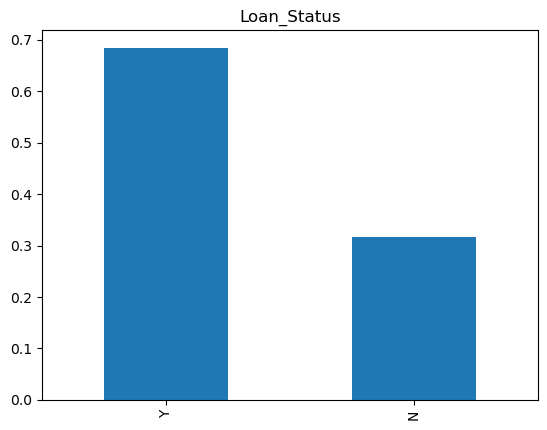

In [45]:
train["Loan-repayment_status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status') #this gives a bar graph

In [46]:
train["Gender"].count()  #size of Gender



585

In [47]:
train["Gender"].value_counts() #returns number of males and females

Male      477
Female    108
Name: Gender, dtype: int64

In [48]:
train["Gender"].value_counts(normalize=True)*100 #returns percentage of male and female

Male      81.538462
Female    18.461538
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Gender'}>

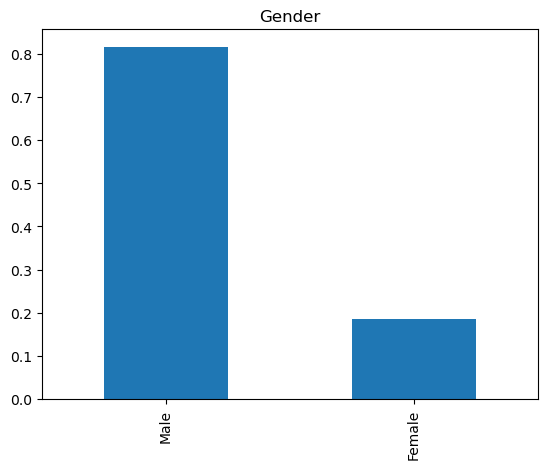

In [49]:
train["Gender"].value_counts(normalize=True).plot.bar(title = 'Gender')

In [50]:
train["State"].value_counts(normalize=True)*100

Gujarat           9.547739
Punjab            8.877722
Kerala            8.710218
Andhra Pradesh    8.542714
Delhi             8.375209
TamilNadu         8.207705
Maharshtra        7.537688
UP                7.537688
Rajasthan         7.370184
Karnataka         7.202680
MadhyaPradesh     6.867672
Uttarakhand       5.527638
west bengal       3.852596
Assam             1.842546
Name: State, dtype: float64

<AxesSubplot:title={'center':'State'}>

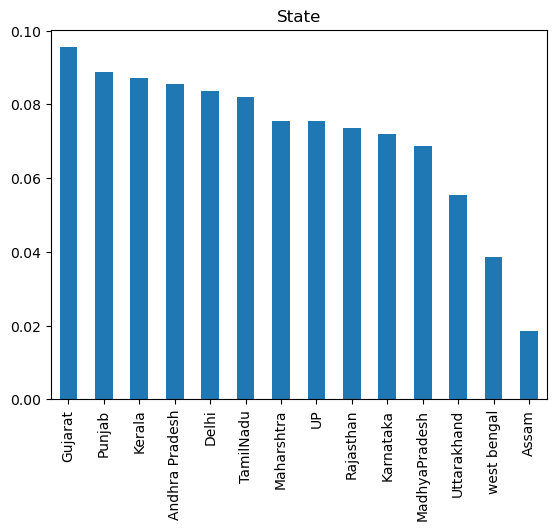

In [51]:
train["State"].value_counts(normalize=True).plot.bar(title = 'State')

<AxesSubplot:title={'center':'Region'}>

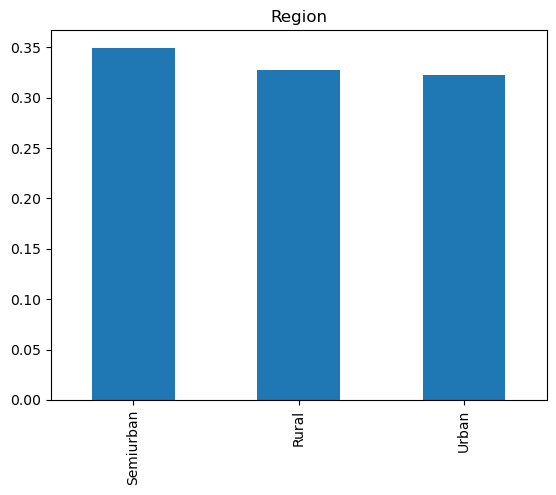

In [52]:
train["Region"].value_counts(normalize=True).plot.bar(title = 'Region')

<AxesSubplot:title={'center':'Type of Bank'}>

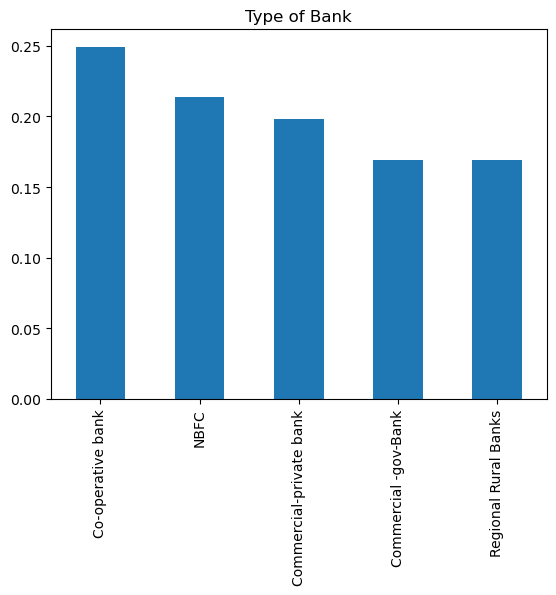

In [53]:
train["Bank"].value_counts(normalize=True).plot.bar(title = 'Type of Bank')

<AxesSubplot:title={'center':'Education Category'}>

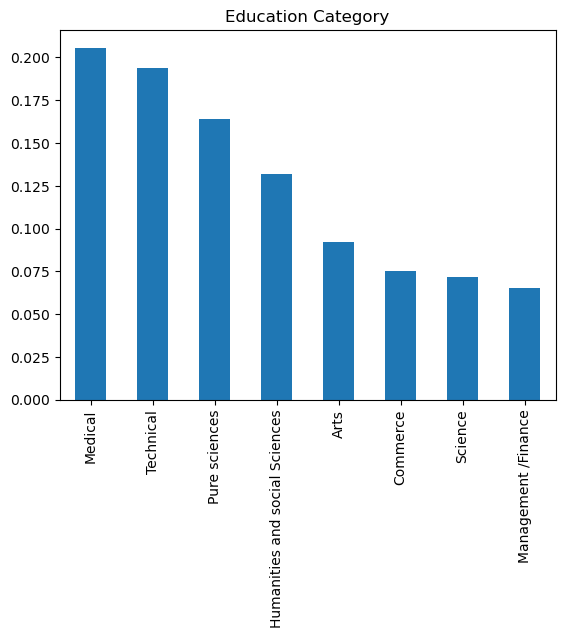

In [54]:
train["Education-Category"].value_counts(normalize=True).plot.bar(title = 'Education Category')

<AxesSubplot:title={'center':'Education level'}>

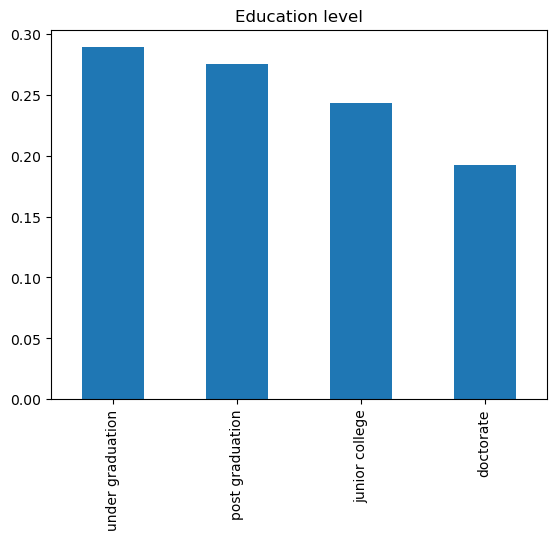

In [55]:
train["Education-level"].value_counts(normalize=True).plot.bar(title = 'Education level')

<AxesSubplot:title={'center':'Type of colleges'}>

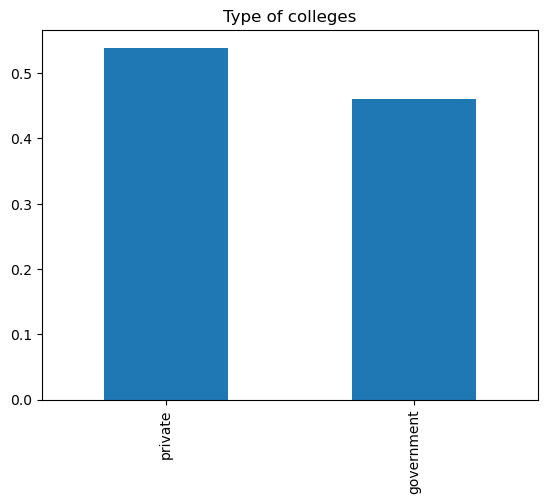

In [56]:
train["Private/Gov.-colleges"].value_counts(normalize=True).plot.bar(title = 'Type of colleges')

<AxesSubplot:title={'center':'Repaid by own or by parents'}>

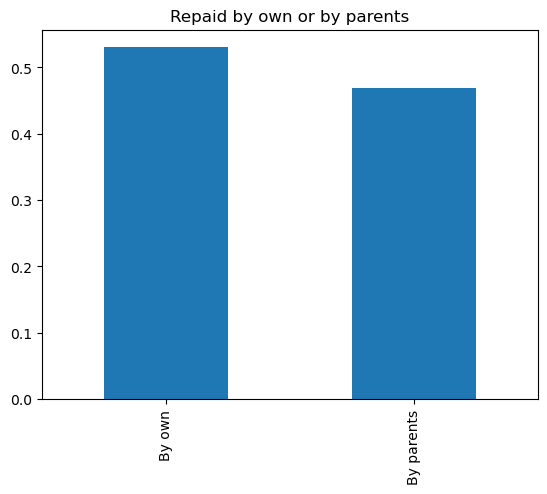

In [57]:
train["Repaid-by-own-or-by-parents"].value_counts(normalize=True).plot.bar(title = 'Repaid by own or by parents')

<AxesSubplot:title={'center':'Secured/unsecured loan'}>

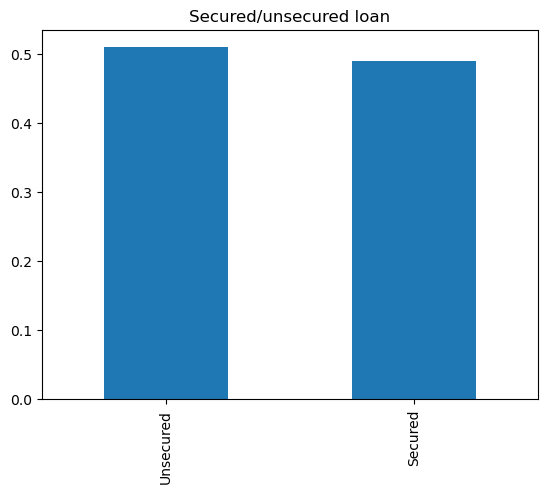

In [58]:
train["Secured/unsecured-loan"].value_counts(normalize=True).plot.bar(title = 'Secured/unsecured loan')

<AxesSubplot:title={'center':'Current satus of employment'}>

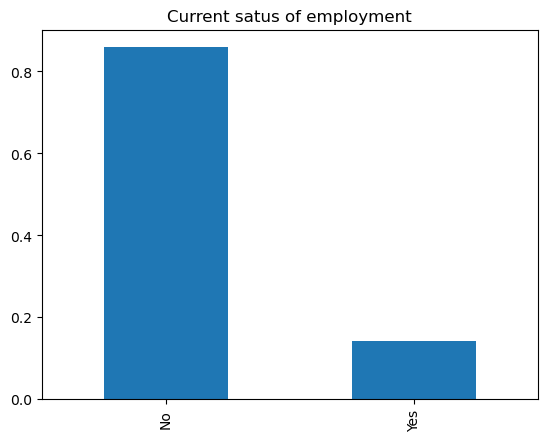

In [59]:
train["Employed"].value_counts(normalize=True).plot.bar(title = 'Current satus of employment')

<AxesSubplot:>

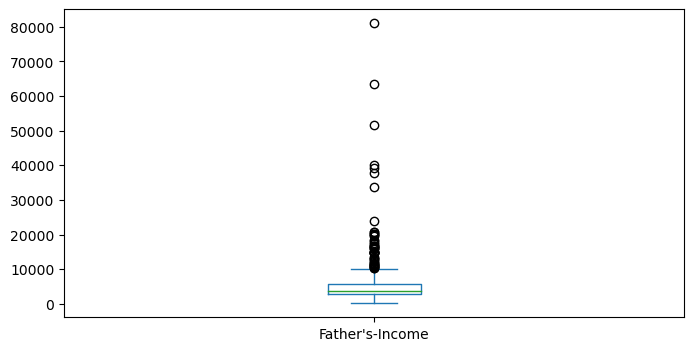

In [60]:
train["Father's-Income"].plot.box(figsize=(8,4))

<AxesSubplot:>

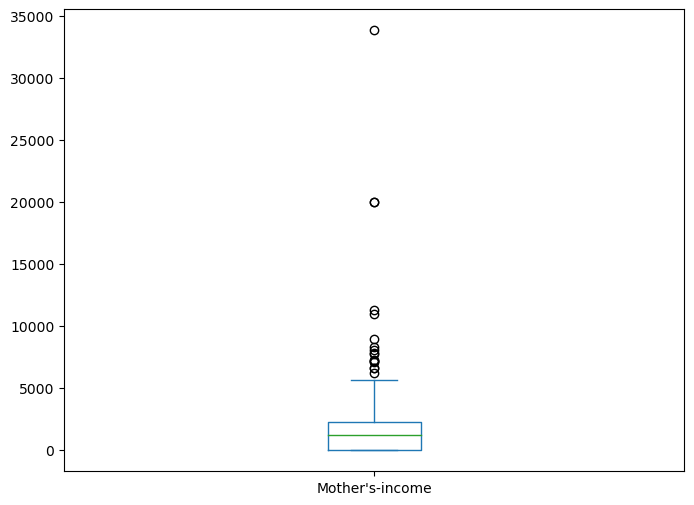

In [62]:
train["Mother's-income"].plot.box(figsize=(8,6))


<AxesSubplot:>

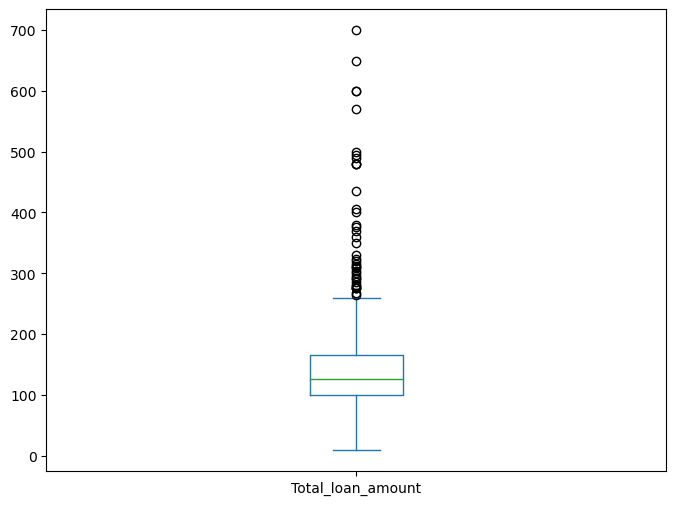

In [63]:
train["Total_loan_amount"].plot.box(figsize=(8,6))

<AxesSubplot:>

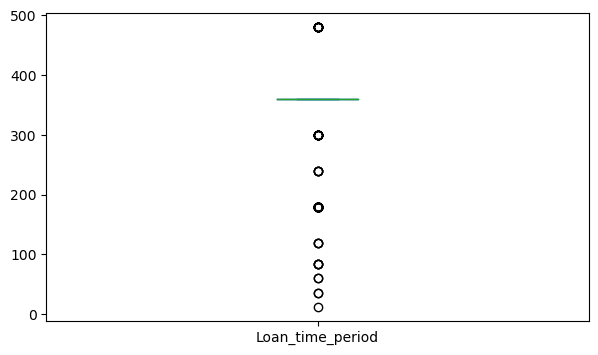

In [64]:
train["Loan_time_period"].plot.box(figsize=(7,4))

<AxesSubplot:>

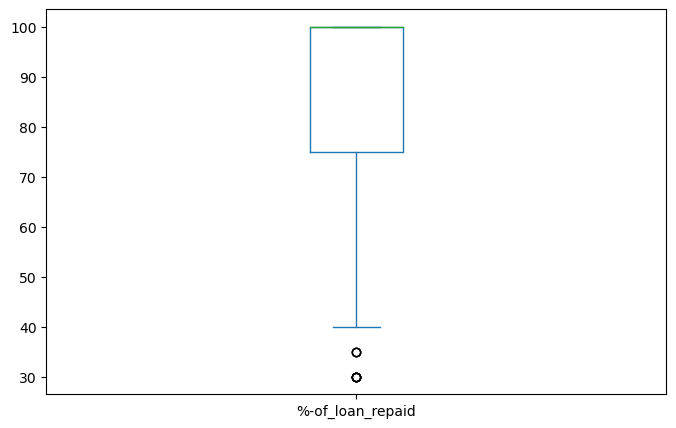

In [66]:
train["%-of_loan_repaid"].plot.box(figsize=(8,5))

In [67]:
df_num = train[["Mother's-income","Father's-Income","Total_loan_amount","Loan_time_period","%-of_loan_repaid"]]

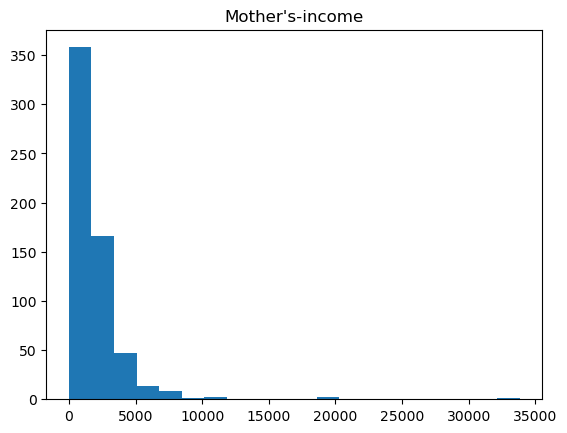

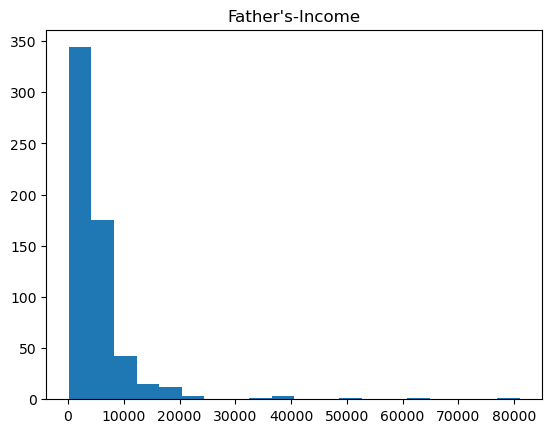

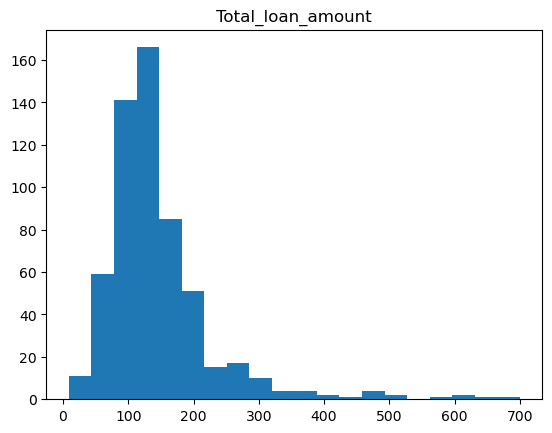

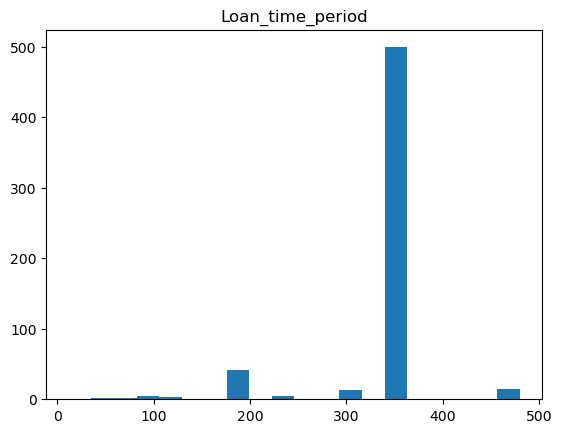

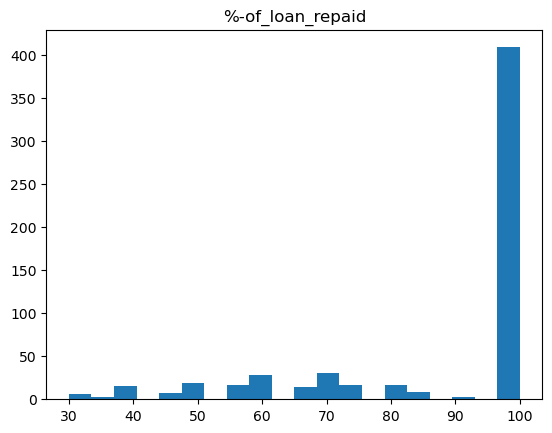

In [68]:
for i in df_num.columns:
    plt.hist(df_num[i],bins=20)
    plt.title(i)
    plt.show()

AxesSubplot(0.1,0.15;0.8x0.75)


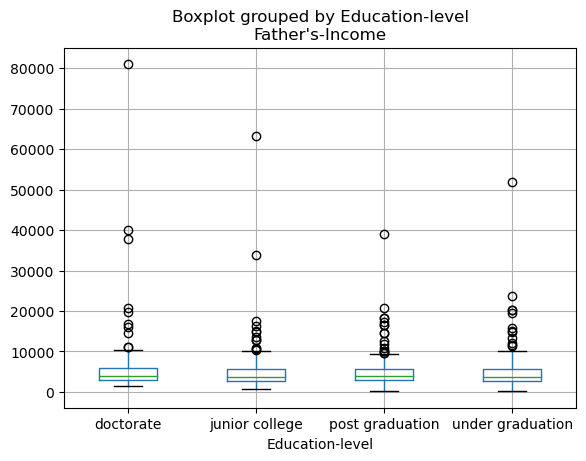

In [69]:
print(train.boxplot(column="Father's-Income",by="Education-level" ))

AxesSubplot(0.1,0.15;0.8x0.75)


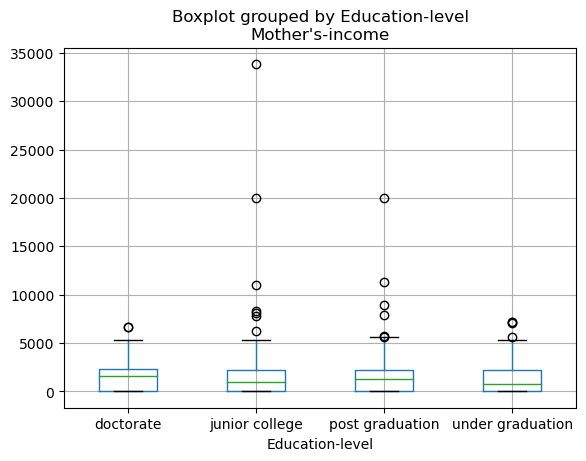

In [70]:
print(train.boxplot(column="Mother's-income",by="Education-level" ))

AxesSubplot(0.1,0.15;0.8x0.75)


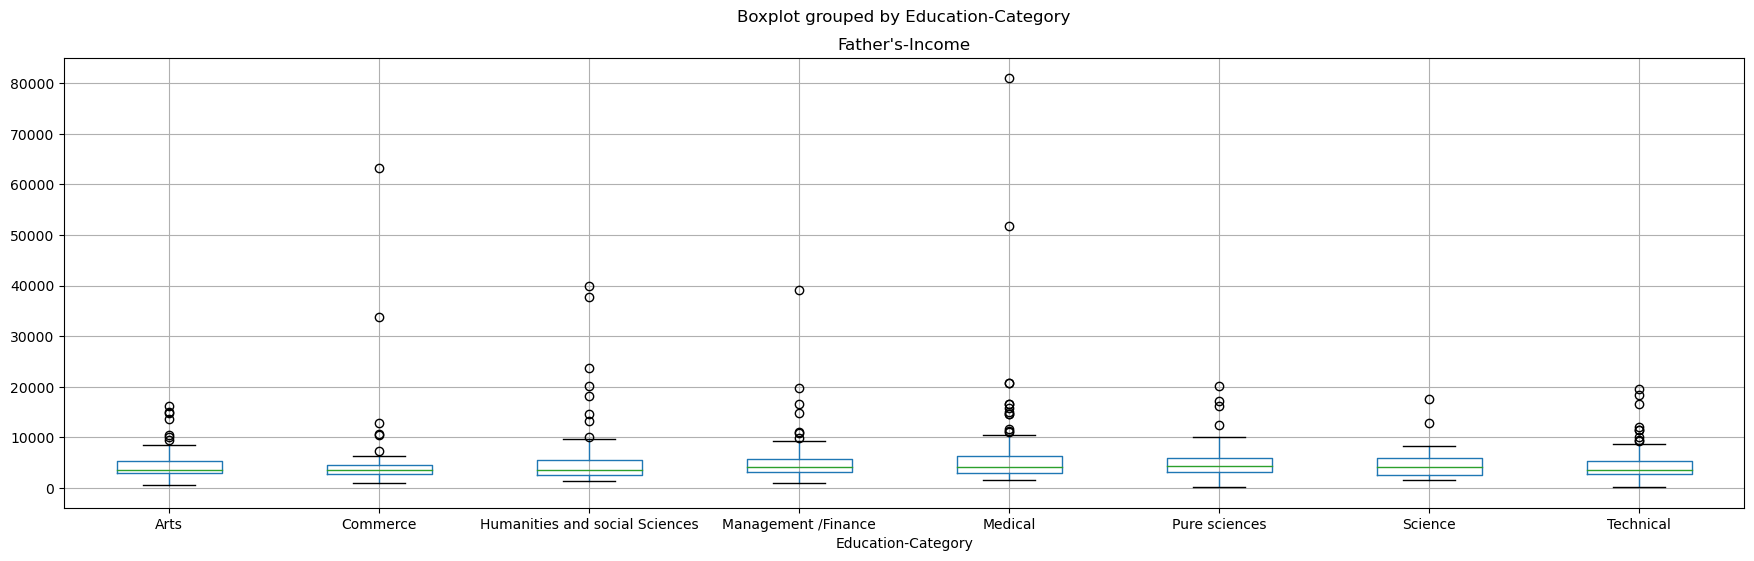

In [71]:
print(train.boxplot(column="Father's-Income",by="Education-Category",figsize=(21,6) ))  # we plot a boxplot of income by education category

AxesSubplot(0.1,0.15;0.8x0.75)


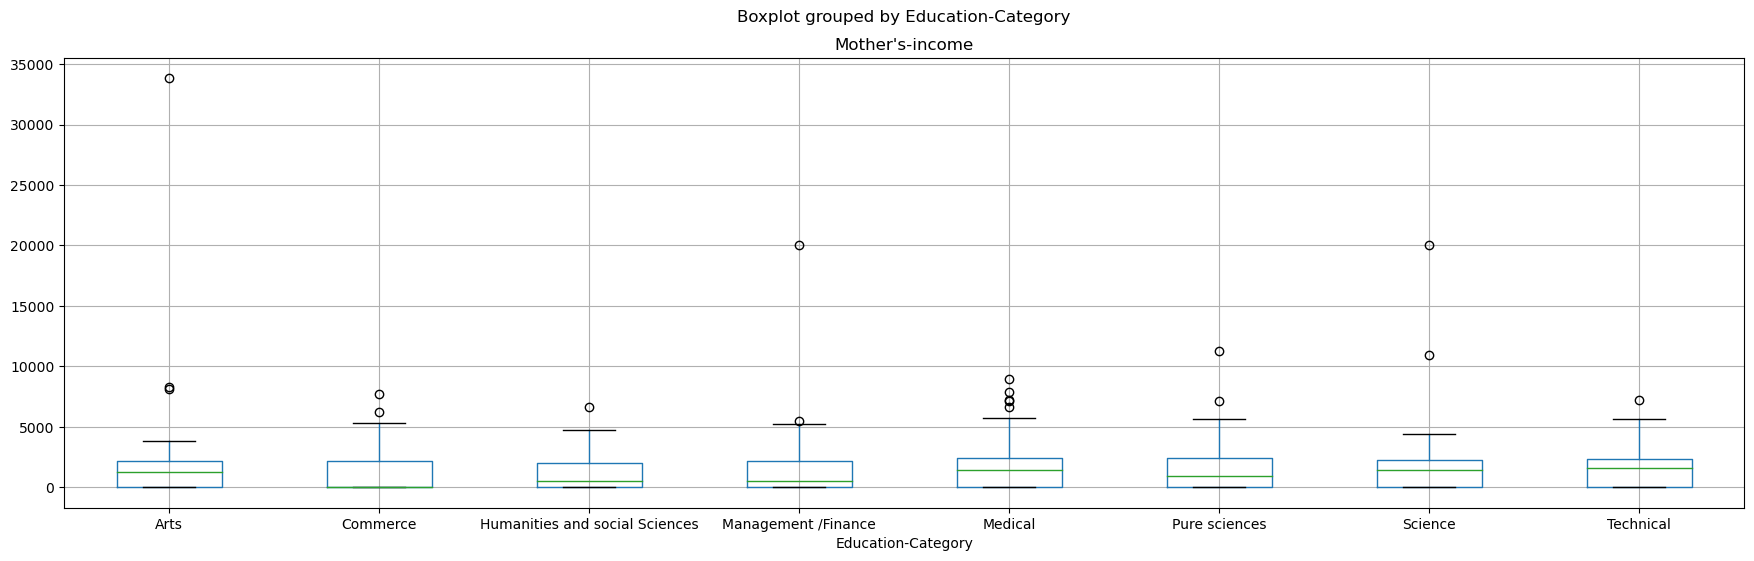

In [72]:
print(train.boxplot(column="Mother's-income",by="Education-Category",figsize=(21,6) ))

<AxesSubplot:>

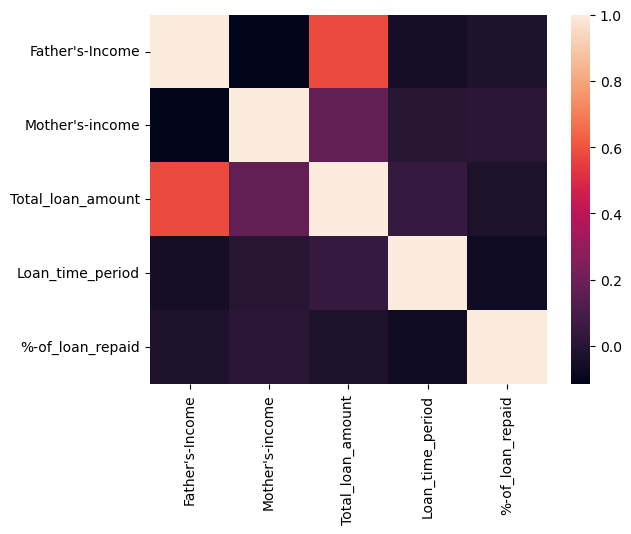

In [73]:
sns.heatmap(train.corr())

In [76]:
train["Mother's income_log"]=np.log(train["Mother's-income"]) #calculating log of a particular variable(feature)

In [77]:
train["Father's Income_log"]=np.log(train["Father's-Income"])

In [78]:
train["Total loan amount_log"]=np.log(train["Total_loan_amount"])

In [79]:
train["% of loan repaid in the decided time period_log"]=np.log(train["%-of_loan_repaid"])

In [80]:
train["Loan time period_log"]=np.log(train["Loan_time_period"])

AxesSubplot(0.125,0.11;0.775x0.77)


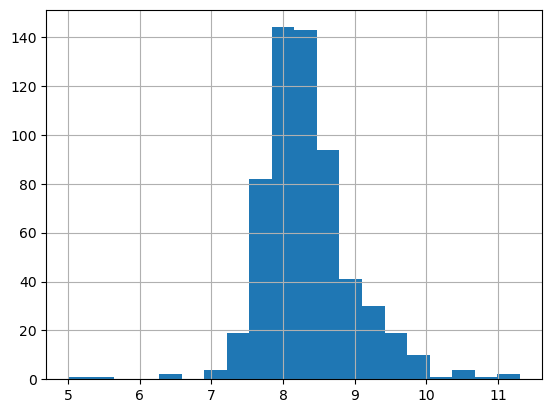

In [81]:
print(train["Father's Income_log"].hist(bins=20))

ValueError: supplied range of [-inf, 10.429310157308027] is not finite

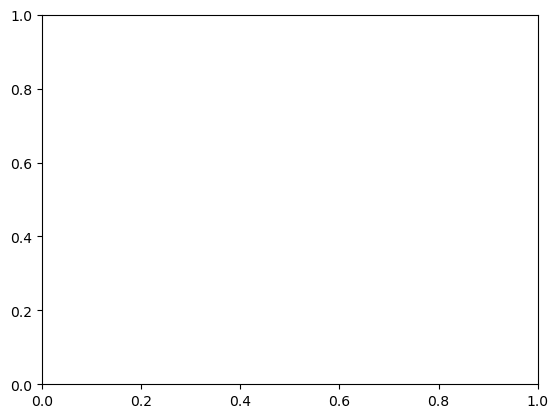

In [82]:
print(train["Mother's income_log"].hist(bins=20))

AxesSubplot(0.125,0.11;0.775x0.77)


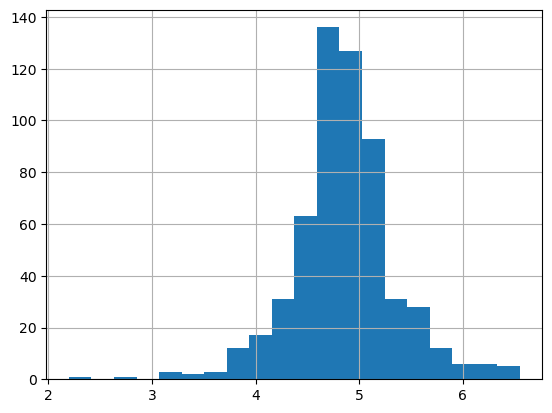

In [83]:
print(train["Total loan amount_log"].hist(bins=20))  # to normalize the histograms we calculate the log of the feature and then plot the histogram of it instead of plotting the histogram of
                                                    #feature itself


<AxesSubplot:xlabel='Total loan amount_log', ylabel='Density'>

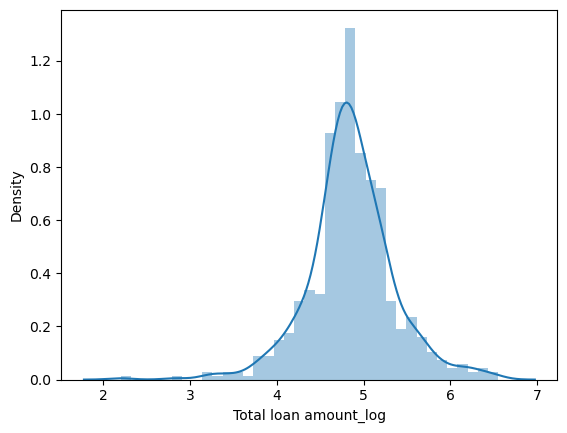

In [84]:
sns.distplot(train['Total loan amount_log'])

AxesSubplot(0.125,0.11;0.775x0.77)


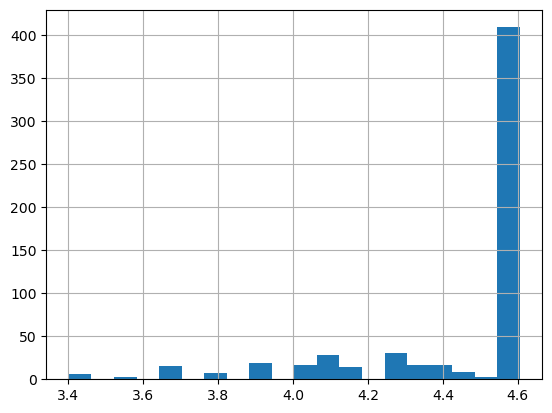

In [85]:
print(train["% of loan repaid in the decided time period_log"].hist(bins=20))

AxesSubplot(0.125,0.11;0.775x0.77)


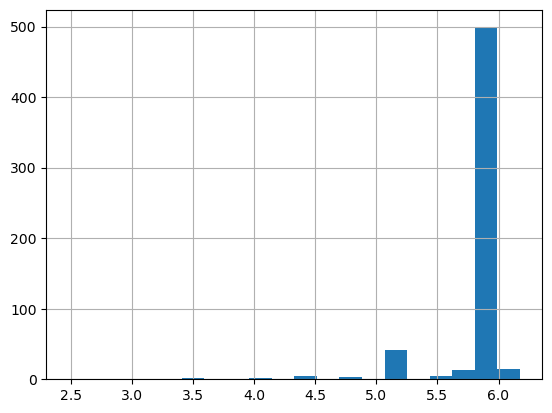

In [86]:
print(train["Loan time period_log"].hist(bins=20))

Loan-repayment_status    N    Y
Gender                         
Female                  35   73
Male                   149  328


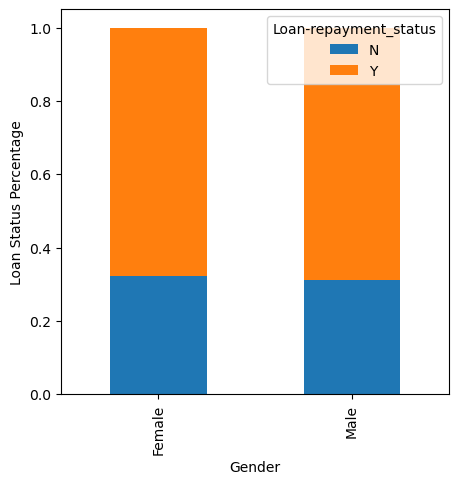

In [87]:
print(pd.crosstab(train["Gender"],train["Loan-repayment_status"]))
Gender = pd.crosstab(train["Gender"],train["Loan-repayment_status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("Gender")
plt.ylabel("Loan Status Percentage")
plt.show()

Loan-repayment_status   N   Y
State                        
Andhra Pradesh         17  34
Assam                   3   8
Delhi                  13  37
Gujarat                19  38
Karnataka              18  25
Kerala                 17  35
MadhyaPradesh           9  32
Maharshtra             13  32
Punjab                 22  31
Rajasthan              10  34
TamilNadu              12  37
UP                     16  29
Uttarakhand            14  19
west bengal             5  18


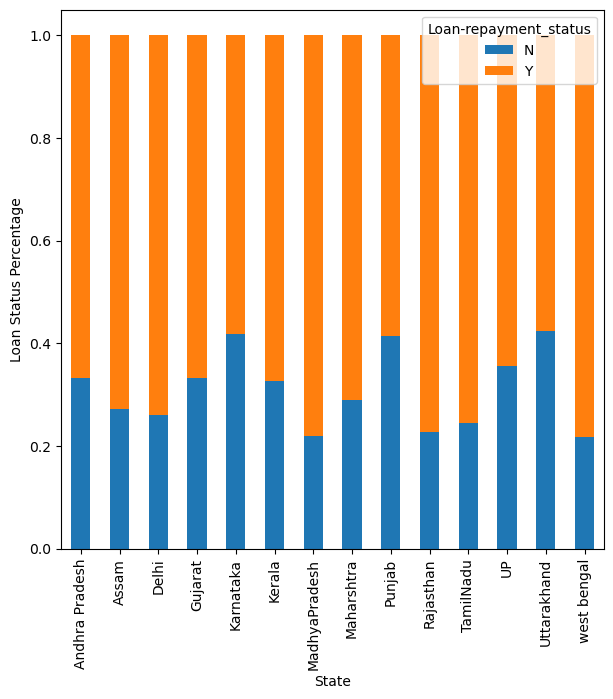

In [88]:
print(pd.crosstab(train["State"],train["Loan-repayment_status"]))
Gender = pd.crosstab(train["State"],train["Loan-repayment_status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.xlabel("State")
plt.ylabel("Loan Status Percentage")
plt.show()

Loan-repayment_status   N    Y
Region                        
Rural                  77  119
Semiurban              46  163
Urban                  66  127


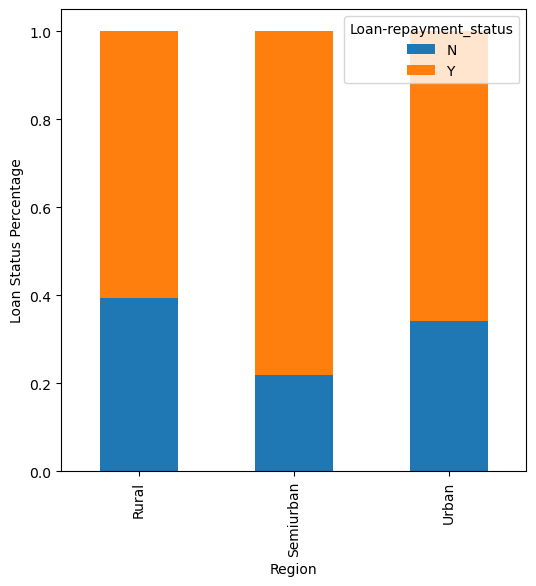

In [89]:
print(pd.crosstab(train["Region"],train["Loan-repayment_status"]))
Gender = pd.crosstab(train["Region"],train["Loan-repayment_status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.xlabel("Region")
plt.ylabel("Loan Status Percentage")
plt.show()

Loan-repayment_status     N   Y
Bank                           
Co-operative bank        50  97
Commercial -gov-Bank     27  73
Commercial-private bank  37  80
NBFC                     37  89
Regional Rural Banks     35  65


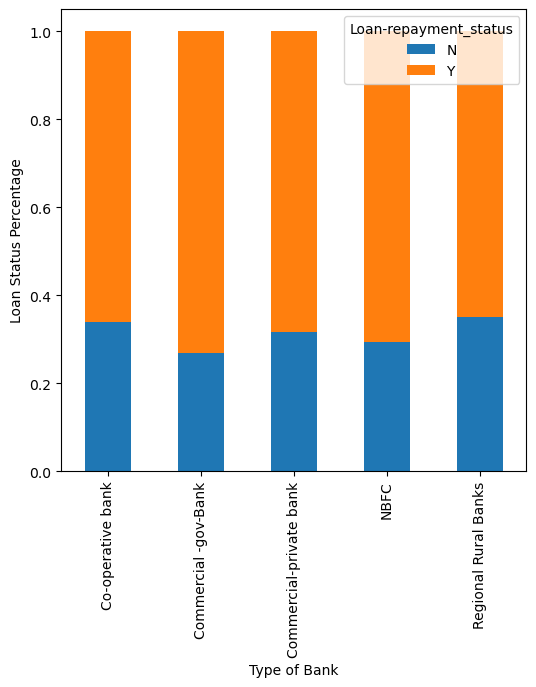

In [92]:
print(pd.crosstab(train["Bank"],train["Loan-repayment_status"]))
Gender = pd.crosstab(train["Bank"],train["Loan-repayment_status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.xlabel("Type of Bank")
plt.ylabel("Loan Status Percentage")
plt.show()

Loan-repayment_status   N    Y
Education-level               
doctorate              29   84
junior college         52   91
post graduation        50  112
under graduation       55  115


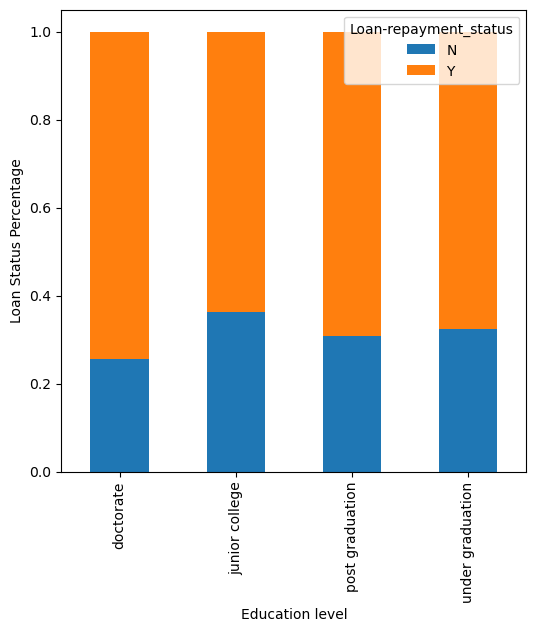

In [93]:
print(pd.crosstab(train["Education-level"],train["Loan-repayment_status"]))
Gender = pd.crosstab(train["Education-level"],train["Loan-repayment_status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.xlabel("Education level")
plt.ylabel("Loan Status Percentage")
plt.show()

Loan repaid in given time        N   Y
Education Category                    
Arts                            21  34
Commerce                        16  29
Humanities and social Sciences  22  57
Management /Finance              9  30
Medical                         42  81
Pure sciences                   27  71
Science                         15  28
Technical                       37  79


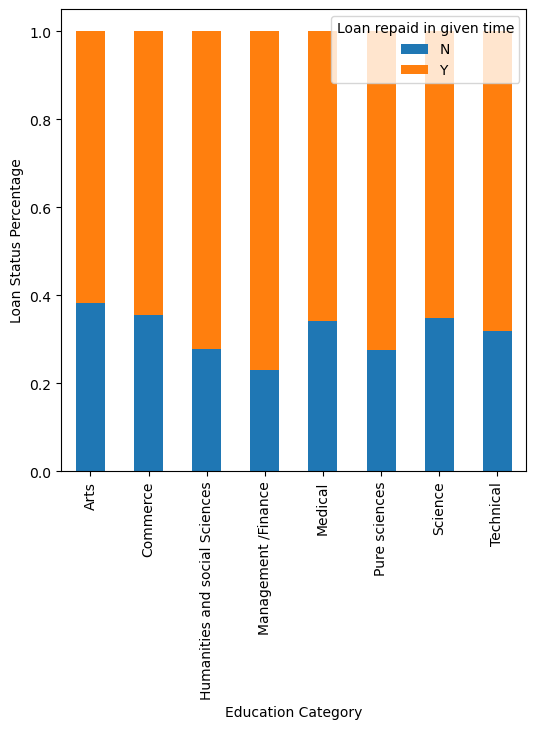

In [64]:
print(pd.crosstab(train["Education Category"],train["Loan repaid in given time"]))
Gender = pd.crosstab(train["Education Category"],train["Loan repaid in given time"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.xlabel("Education Category")
plt.ylabel("Loan Status Percentage")
plt.show()

Loan-repayment_status    N    Y
Private/Gov.-colleges          
government              79  193
private                109  209


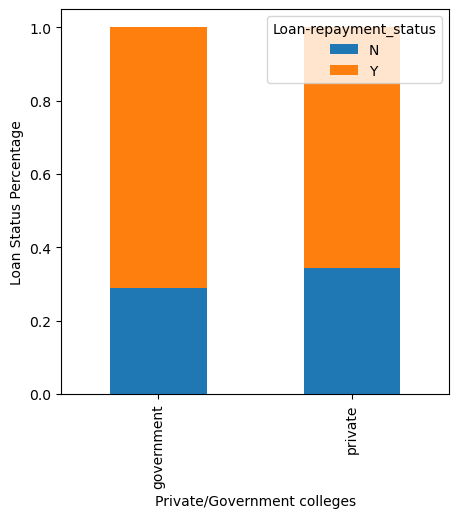

In [94]:
print(pd.crosstab(train["Private/Gov.-colleges"],train["Loan-repayment_status"]))
Gender = pd.crosstab(train["Private/Gov.-colleges"],train["Loan-repayment_status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("Private/Government colleges")
plt.ylabel("Loan Status Percentage")
plt.show()

Loan-repayment_status          N    Y
Repaid-by-own-or-by-parents          
By own                       101  212
By parents                    85  192


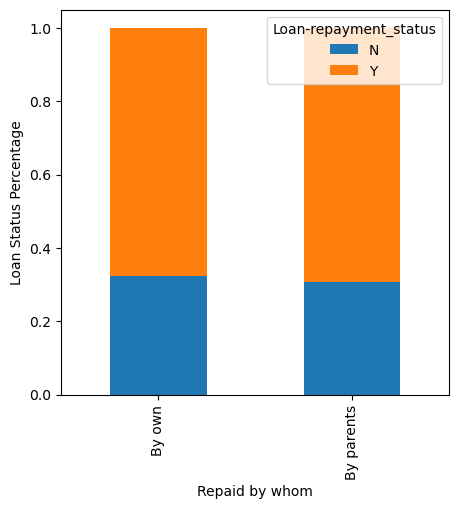

In [95]:
print(pd.crosstab(train["Repaid-by-own-or-by-parents"],train["Loan-repayment_status"]))
Gender = pd.crosstab(train["Repaid-by-own-or-by-parents"],train["Loan-repayment_status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("Repaid by whom")
plt.ylabel("Loan Status Percentage")
plt.show()

Loan-repayment_status    N    Y
Secured/unsecured-loan         
Secured                 93  196
Unsecured               93  208


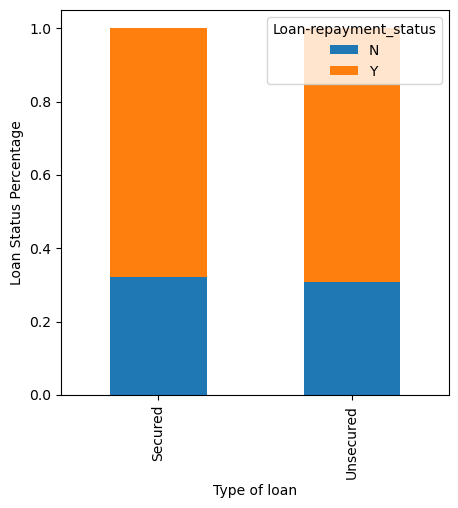

In [96]:
print(pd.crosstab(train["Secured/unsecured-loan"],train["Loan-repayment_status"]))
Gender = pd.crosstab(train["Secured/unsecured-loan"],train["Loan-repayment_status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("Type of loan")
plt.ylabel("Loan Status Percentage")
plt.show()

Loan-repayment_status    N    Y
Employed                       
No                     156  332
Yes                     25   55


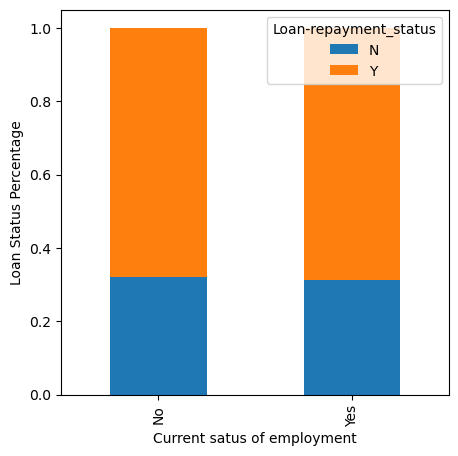

In [97]:
print(pd.crosstab(train["Employed"],train["Loan-repayment_status"]))
Gender = pd.crosstab(train["Employed"],train["Loan-repayment_status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("Current satus of employment")
plt.ylabel("Loan Status Percentage")
plt.show()

In [98]:
train.isnull().sum() # this gives the total count of missing values for all features 
##if any feature has many null entries , we can drop it as it increases noise


Name                                                0
Gender                                             13
State                                               1
Region                                              0
Father's-Income                                     0
Mother's-income                                     0
Bank                                                8
Education-Category                                  0
Education-level                                    10
Private/Gov.-colleges                               8
Total_loan_amount                                  21
Loan_time_period                                   14
Repaid-by-own-or-by-parents                         8
Secured/unsecured-loan                              8
Loan-repayment_status                               0
%-of_loan_repaid                                    3
Employed                                           30
Mother's income_log                                 0
Father's Income_log         

In [99]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True) #filling missing values by mode 


In [100]:
train["State"].fillna(train["State"].mode()[0],inplace=True)

In [101]:
train["Bank"].fillna(train["Bank"].mode()[0],inplace=True)

In [102]:
train["Education-level"].fillna(train["Education-level"].mode()[0],inplace=True)

In [103]:
train["Private/Gov.-colleges"].fillna(train["Private/Gov.-colleges"].mode()[0],inplace=True)

In [104]:
train["Repaid-by-own-or-by-parents"].fillna(train["Repaid-by-own-or-by-parents"].mode()[0],inplace=True)

In [105]:
train["Secured/unsecured-loan"].fillna(train["Secured/unsecured-loan"].mode()[0],inplace=True)

In [106]:
train["Employed"].fillna(train["Employed"].mode()[0],inplace=True)

In [107]:
train.isnull().sum()

Name                                                0
Gender                                              0
State                                               0
Region                                              0
Father's-Income                                     0
Mother's-income                                     0
Bank                                                0
Education-Category                                  0
Education-level                                     0
Private/Gov.-colleges                               0
Total_loan_amount                                  21
Loan_time_period                                   14
Repaid-by-own-or-by-parents                         0
Secured/unsecured-loan                              0
Loan-repayment_status                               0
%-of_loan_repaid                                    3
Employed                                            0
Mother's income_log                                 0
Father's Income_log         

In [108]:
train["Total_loan_amount"].fillna(train["Total_loan_amount"].mean(),inplace=True)

In [109]:
train["Loan_time_period"].fillna(train["Loan_time_period"].median(),inplace=True) 
#We will use median instead of mean to fill the null values if there are many outliers in the feature variable
 

In [110]:
train["%-of_loan_repaid"].fillna(train["%-of_loan_repaid"].median(),inplace=True)

In [111]:
train.isnull().sum()

Name                                                0
Gender                                              0
State                                               0
Region                                              0
Father's-Income                                     0
Mother's-income                                     0
Bank                                                0
Education-Category                                  0
Education-level                                     0
Private/Gov.-colleges                               0
Total_loan_amount                                   0
Loan_time_period                                    0
Repaid-by-own-or-by-parents                         0
Secured/unsecured-loan                              0
Loan-repayment_status                               0
%-of_loan_repaid                                    0
Employed                                            0
Mother's income_log                                 0
Father's Income_log         

In [112]:
train['Total-Income']=train["Father's-Income"]+train["Mother's-income"]
#feature engineering --> creating new appropiate features which affect the target variable

In [113]:
train['Total-Income'].head(5)

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Total-Income, dtype: float64

In [156]:

train.drop(["Name","Father's-Income","Mother's-income","Mother's income_log","Total-Income","Father's Income_log","Total loan amount_log","Loan time period_log","% of loan repaid in the decided time period_log"],axis=1) #Dropping the not required feature variables

,Gender,State,Region,Bank,Education-Category,Education-level,Private/Gov.-colleges,Total_loan_amount,Loan_time_period,Repaid-by-own-or-by-parents,Secured/unsecured-loan,Loan-repayment_status,%-of_loan_repaid,Employed
0,NaN,13,2,2,0,1,1,145.37435,360.0,By parents,1,1,100.0,0
1,NaN,6,0,0,3,3,1,128.00000,360.0,By own,0,0,50.0,0
2,NaN,6,2,3,7,2,0,66.00000,360.0,By parents,0,1,100.0,1
3,NaN,1,2,1,4,0,1,120.00000,360.0,By own,1,1,100.0,0
4,NaN,12,0,4,5,2,0,141.00000,360.0,By parents,1,1,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,NaN,0,0,2,7,3,1,142.00000,180.0,By own,0,1,100.0,0
594,NaN,6,2,0,5,0,0,260.00000,360.0,By own,1,1,100.0,1
595,NaN,5,0,4,1,1,0,110.00000,360.0,By parents,0,1,100.0,0
596,NaN,5,0,3,4,0,1,187.00000,360.0,By parents,0,0,80.0,1


In [115]:
train.head()

,Name,Gender,State,Region,Father's-Income,Mother's-income,Bank,Education-Category,Education-level,Private/Gov.-colleges,...,Secured/unsecured-loan,Loan-repayment_status,%-of_loan_repaid,Employed,Mother's income_log,Father's Income_log,Total loan amount_log,% of loan repaid in the decided time period_log,Loan time period_log,Total-Income
0,LP001002,Male,west bengal,Urban,5849,0.0,Commercial-private bank,Arts,junior college,private,...,Unsecured,Y,100.0,No,-inf,8.674026,NaN,4.605170,5.886104,5849.0
1,LP001003,Male,MadhyaPradesh,Rural,4583,1508.0,Co-operative bank,Management /Finance,under graduation,private,...,Secured,N,50.0,No,7.318540,8.430109,4.852030,3.912023,5.886104,6091.0
2,LP001005,Male,MadhyaPradesh,Urban,3000,0.0,NBFC,Technical,post graduation,government,...,Secured,Y,100.0,Yes,-inf,8.006368,4.189655,4.605170,5.886104,3000.0
3,LP001006,Male,Assam,Urban,2583,2358.0,Commercial -gov-Bank,Medical,doctorate,private,...,Unsecured,Y,100.0,No,7.765569,7.856707,4.787492,4.605170,5.886104,4941.0
4,LP001008,Male,Uttarakhand,Rural,6000,0.0,Regional Rural Banks,Pure sciences,post graduation,government,...,Unsecured,Y,100.0,No,-inf,8.699515,4.948760,4.605170,5.886104,6000.0


In [30]:
#final_df.drop('Gender', axis=1, inplace=True)

In [32]:
# ohenc.get_feature_names()
#final_df.columns = ohenc.get_feature_names()

NameError: name 'ohenc' is not defined

In [116]:
from sklearn.preprocessing import LabelEncoder


In [117]:
label_encoder=LabelEncoder()

In [118]:
train["State"]=label_encoder.fit_transform(train["State"])

In [119]:
train["Education-Category"]=label_encoder.fit_transform(train["Education-Category"])

In [120]:
train["Bank"]=label_encoder.fit_transform(train["Bank"])

In [121]:
train["Region"]=label_encoder.fit_transform(train["Region"])

In [128]:
train["Gender"]=label_encoder.fit_transform(train["Gender"]) #train.Gender=train.Gender.map({'Male':1,'Female':0})

In [138]:
train["Employed"]=label_encoder.fit_transform(train["Employed"])

In [145]:
train["Private/Gov.-colleges"]=label_encoder.fit_transform(train["Private/Gov.-colleges"])

In [147]:
train["Secured/unsecured-loan"]=label_encoder.fit_transform(train["Secured/unsecured-loan"])

In [139]:
#train.Education-level=train.Education-level.map({'junior college':0,'under graduation':1,'post graduation':2,'doctorate':3})

In [148]:
train["Education-level"]=label_encoder.fit_transform(train["Education-level"])

In [157]:
train["Loan-repayment_status"]=label_encoder.fit_transform(train["Loan-repayment_status"]) #train.Loan-repayment_status=train.Loan-repayment_status.map({'Y':1,'N':0})

In [159]:
#from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
#encoder_df = pd.DataFrame(encoder.fit_transform(train[['Gender']]).toarray())

#merge one-hot encoded columns back with original DataFrame
#train_df = train.join(encoder_df)

#view final df
#train_df.head()

In [160]:
train.head(20)

,Name,Gender,State,Region,Father's-Income,Mother's-income,Bank,Education-Category,Education-level,Private/Gov.-colleges,...,Secured/unsecured-loan,Loan-repayment_status,%-of_loan_repaid,Employed,Mother's income_log,Father's Income_log,Total loan amount_log,% of loan repaid in the decided time period_log,Loan time period_log,Total-Income
0,LP001002,NaN,13,2,5849,0.0,2,0,1,1,...,1,1,100.0,0,-inf,8.674026,NaN,4.605170,5.886104,5849.0
1,LP001003,NaN,6,0,4583,1508.0,0,3,3,1,...,0,0,50.0,0,7.318540,8.430109,4.852030,3.912023,5.886104,6091.0
2,LP001005,NaN,6,2,3000,0.0,3,7,2,0,...,0,1,100.0,1,-inf,8.006368,4.189655,4.605170,5.886104,3000.0
3,LP001006,NaN,1,2,2583,2358.0,1,4,0,1,...,1,1,100.0,0,7.765569,7.856707,4.787492,4.605170,5.886104,4941.0
4,LP001008,NaN,12,0,6000,0.0,4,5,2,0,...,1,1,100.0,0,-inf,8.699515,4.948760,4.605170,5.886104,6000.0
5,LP001011,NaN,8,2,5417,4196.0,1,4,3,0,...,0,1,100.0,1,8.341887,8.597297,5.587249,4.605170,5.886104,9613.0
6,LP001013,NaN,13,2,2333,1516.0,3,0,1,1,...,0,1,100.0,0,7.323831,7.754910,4.553877,4.605170,5.886104,3849.0
7,LP001014,NaN,0,2,3036,2504.0,2,5,2,1,...,0,0,60.0,0,7.825645,8.018296,5.062595,4.094345,5.886104,5540.0
8,LP001018,NaN,0,2,4006,1526.0,2,2,0,1,...,0,1,100.0,0,7.330405,8.295549,5.123964,4.605170,5.886104,5532.0
9,LP001020,NaN,7,2,12841,10968.0,3,6,1,1,...,1,0,75.0,0,9.302737,9.460398,5.855072,4.317488,5.886104,23809.0
